In [ ]:
#!wget -P /content/drive/MyDrive/chatz https://sapienza2023adm.s3.eu-south-1.amazonaws.com/lighter_authors.json
#!wget -P /content/drive/MyDrive/chatz https://sapienza2023adm.s3.eu-south-1.amazonaws.com/lighter_books.json

# IMPORTANT

At the very begin of every python script, you will be able to find a **series of lines comented** (#) with written "**MY IDEA -->**". those lines explain the general idea I wanted to perform in order to get the result. In the script you will be also able to find in-lines comments.

*note:* whenever there is a question that needs to be discussed, you will be able to find the answer after the script in a cell similar to this one. 

## RQ5

In [1]:
#here I import all the libraries I will need
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import math
import seaborn as sns

### RQ5.1

Plot the top 10 most influential authors regarding their fan count and number of books. Who is the most influential author?

In [ ]:
#Open the first file and converting it into a dataframe
df_lighter_authors = pd.read_json("lighter_authors.json", lines = True)

                Author Name  Fan Count  \
1017           Stephen King     766035   
169374        Veronica Roth     455358   
6397            Bill  Gates     446876   
205870       Colleen Hoover     356633   
4537           Rick Riordan     339346   
1161        James Patterson     317040   
100166           John Green     282537   
3818    Neil deGrasse Tyson     277850   
27110       Cassandra Clare     238560   
32358          Mindy Kaling     234647   

                                          Number of Books  Influence Score  
1017    [11588, 830502, 149267, 10614, 10592, 43615, 1...          1117802  
169374  [13335037, 11735983, 18710190, 18126198, 13615...           807125  
6397    [36603020, 39731947, 41619, 1081637, 41814307,...           798643  
205870  [15717943, 27362503, 30333938, 17788401, 24445...           708400  
4537    [28187, 2120932, 28186, 4556058, 561456, 77361...           691113  
1161    [13145, 13148, 13137, 13152, 7494, 13139, 1313...           668807 

Text(0.5, 1.0, 'Top 10 Influent Authors')

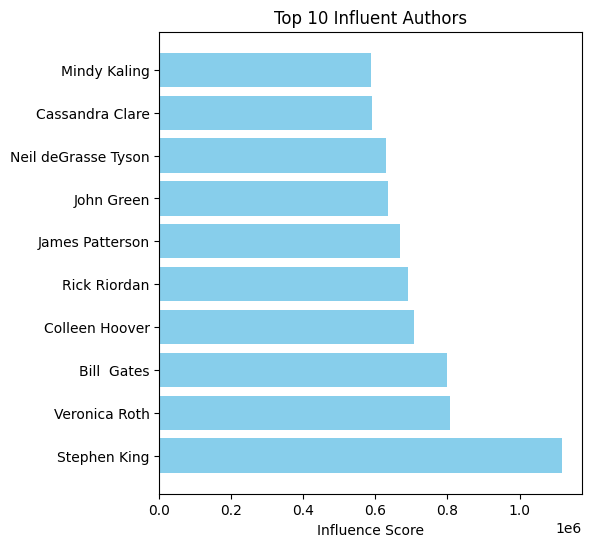

In [54]:
#MY IDEA: --> in order to plot the 10 most influential authors, I first need to retrieve their fans count and the number of books they published. Since the dataset is very large,
# I "filter" it by taking only the columns I need. Therefore, I will take: the name of the author, the number of fans and the list of books.
# To answer the question, I need to order the authors. In order to do so, I creat a "influential index" made by the sum of the total books published and the number of fans.
# after this operation, I sort the result from the greatest to the lowest and then plot the result
# note: the total number of books is retrieved by inspecting the length of the list of all the books published.

#create the smaller dataframe 
df = pd.DataFrame({
    'Author Name': df_lighter_authors['name'],
    'Fan Count': df_lighter_authors['fans_count'],
    'Number of Books': df_lighter_authors['book_ids']
})

df['Influence Score'] = df['Fan Count'] + len(df['Number of Books'])
#sort it  by 'Influence Score' in descending order
sorted_df = df.sort_values(by='Influence Score', ascending=False)
#select the top 10 authors
top_10_authors = sorted_df.head(10)
#print them
print(top_10_authors[['Author Name', 'Fan Count', 'Number of Books', 'Influence Score']])

#plot the result 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(top_10_authors['Author Name'], top_10_authors['Influence Score'], color='skyblue')
plt.xlabel('Influence Score')
plt.title('Top 10 Influent Authors')

#### Answer:
The most influential author is **Stephen King**

## RQ5.2

Have they published any series of books? If any, extract the longest series name among these authors.

In [6]:
#MY IDEA --> now I need to inspect the lighter_books.json file but since the file is very very very (VERY) large, I can not open it as the other one, so i read it in chunks and then merge them. 
#Furthermore, in order to work better, for every passage I will need this file, I retain only the columns I need 
#(so the following code may appear again during the tasks with some variations according to my necessities).
#in this case I need to check if a writer has written a book series, so I will only need the column with their names and the columns related to the series.


#file
json_file_path = 'lighter_books.json'
#the columns I want
columns_to_read = ["author_name", "series_id","series_name","series_position"]
#chunk size 
chunk_size = 20000
#empty dataframe to store result
result_df = pd.DataFrame(columns=columns_to_read)
#read the file 
json_reader = pd.read_json(json_file_path, lines=True, chunksize=chunk_size)

#for every chunk append the selected columns to the dataframe I created before to store the result 
for chunk in json_reader:
    chunk = chunk[columns_to_read]  
    result_df = pd.concat([result_df, chunk], ignore_index=True)

print(result_df.head())

    author_name series_id   series_name series_position
0  J.K. Rowling     45175  Harry Potter               5
1  J.K. Rowling     45175  Harry Potter               1
2  J.K. Rowling     45175  Harry Potter               2
3  J.K. Rowling     45175  Harry Potter               3
4  J.K. Rowling     45175  Harry Potter               4


In [7]:
#MY IDEA --> to check if an author has written a serie, I first write their name and check if in the column series_id there is at least one entry.
#If that is the case, it means that the author has written a series of book. If this is not the case and everything is NA, then they have not written a series of book.
#since the authors are only ten (1 of which is not an author) I will check them one by one. This may be slow and can be implemented by doing simultaneously but I have few time so
#I will proceed in this way for now and if I have time I will implement it (so you will not read this :) )

author_name_to_check = "Mindy Kaling"
#filter the dataframe with their name
author_books = result_df[result_df['author_name'] == author_name_to_check]
#check for NA
has_written_series = not author_books['series_id'].isna().all()
#output for me
if has_written_series:
    print(f"{author_name_to_check} has written a series of books.")
else:
    print(f"{author_name_to_check} has not written a series of books.")

Mindy Kaling has written a series of books.


In [8]:
#MY IDEA --> now I take all the authors and subset the dataframe using their names. Then I take the maximum number for each author of the column series_position. This is because the 
#column itself store the number of a book of a specific serie ex: Harry potter the order of the phoenix will have 5 as a number. So I just need to retrieve the greatest to 
#retrieve the longest one. 

specific_authors = ["Stephen King", "Veronica Roth","Colleen Hoover", "Rick Riordan", "James Patterson", "John Green", "Neil deGrasse Tyson", "Cassandra Clare","Mindy Kaling"]
specific_authors_df = result_df[result_df['author_name'].isin(specific_authors)]
max_series_positions = specific_authors_df.groupby('author_name')['series_position'].max()
print(max_series_positions)

author_name
Cassandra Clare               Sampler
Colleen Hoover                      3
James Patterson                     9
John Green                          2
Mindy Kaling                         
Neil deGrasse Tyson                 2
Rick Riordan           companion book
Stephen King                       7C
Veronica Roth                       3
Name: series_position, dtype: object


### Answer

Sthepen King has written a series of books. Veronica Roth has written a series of books. Colleen Hoover has written a series of books. Rick Riordan has written a series of books. James Patterson has written a series of books. John Green has written a series of books. Neil deGrasse Tyson has written a series of books. Cassandra Clare has written a series of books, Mindy Caling has not written a series of books.

The author with the longest book series is: **James Patterson**. The Book series is: **Alex Cross**

## RQ5.3

How many of these authors have been published in different formats? Provide a meaningful chart on the distribution of the formats and comment on it.

In [9]:
#MY IDEA --> as I warned before, now you have the same code with slightly differences.
#this time I have to do exactly what I did before but selecting different columns; so I will retain the author, the book title and the format (what I am looking after)

json_file_path = 'lighter_books.json'
columns_to_read = ["author_name","format","title"]
chunk_size = 20000  
result_df = pd.DataFrame(columns=columns_to_read)
json_reader = pd.read_json(json_file_path, lines=True, chunksize=chunk_size)
for chunk in json_reader:
    chunk = chunk[columns_to_read]  
    result_df = pd.concat([result_df, chunk], ignore_index=True)

print(result_df.head())

    author_name                 format  \
0  J.K. Rowling              Paperback   
1  J.K. Rowling              Hardcover   
2  J.K. Rowling              Hardcover   
3  J.K. Rowling  Mass Market Paperback   
4  J.K. Rowling              Paperback   

                                               title  
0  Harry Potter and the Order of the Phoenix (Har...  
1  Harry Potter and the Sorcerer's Stone (Harry P...  
2  Harry Potter and the Chamber of Secrets (Harry...  
3  Harry Potter and the Prisoner of Azkaban (Harr...  
4  Harry Potter and the Goblet of Fire (Harry Pot...  


In [10]:
#MY IDEA --> now I have to check the format type, so for each author I see the format type by selecting only one time to see in which way they have been ever published.

#I check the different types of format for each publisher
author_names = ["Stephen King", "Veronica Roth","Colleen Hoover", "Rick Riordan", "James Patterson", "John Green", "Neil deGrasse Tyson", "Cassandra Clare","Mindy Kaling"]
all_formats_df = pd.DataFrame(columns=['Author Name', 'Formats Published'])

#check for each author
for author_name in author_names:
    #filter the dataframe for the author 
    author_df = result_df[result_df['author_name'] == author_name]
    #group by author
    grouped = author_df.groupby('author_name')
    #group by format 
    formats_published = grouped['format'].unique().reset_index()
    formats_published.columns = ['Author Name', 'Formats Published']

    all_formats_df = pd.concat([all_formats_df, formats_published])


all_formats_df = all_formats_df.reset_index(drop=True)
#result
print(all_formats_df)



           Author Name                                  Formats Published
0         Stephen King  [Mass Market Paperback, Paperback, , Hardcover...
1        Veronica Roth  [Hardcover, , Trade Paperback, Paperback, eboo...
2       Colleen Hoover  [ebook, Paperback, Kindle Edition, , Audiobook...
3         Rick Riordan  [Hardcover, Paperback, Audio CD, Library Bindi...
4      James Patterson  [Paperback, Mass Market Paperback, , Hardcover...
5           John Green  [Hardcover, Paperback, Audio CD, Flexcover, eb...
6  Neil deGrasse Tyson  [Paperback, Hardcover, Audio CD, Audiobook, Au...
7      Cassandra Clare  [Hardcover, Audio CD, Paperback, Audiobook, Ki...
8         Mindy Kaling  [Paperback, Hardcover, Audio CD, , ebook, Audi...


C:\Users\stefa\AppData\Local\Temp\ipykernel_31936\3219699022.py:14: UserWarning: Glyph 21109 (\N{CJK UNIFIED IDEOGRAPH-5275}) missing from current font.
  plt.tight_layout()
C:\Users\stefa\AppData\Local\Temp\ipykernel_31936\3219699022.py:14: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from current font.
  plt.tight_layout()
C:\Users\stefa\AppData\Local\Temp\ipykernel_31936\3219699022.py:14: UserWarning: Glyph 25512 (\N{CJK UNIFIED IDEOGRAPH-63A8}) missing from current font.
  plt.tight_layout()
C:\Users\stefa\AppData\Local\Temp\ipykernel_31936\3219699022.py:14: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from current font.
  plt.tight_layout()
C:\Users\stefa\AppData\Local\Temp\ipykernel_31936\3219699022.py:14: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  plt.tight_layout()
C:\Users\stefa\AppData\Local\Temp\ipykernel_31936\3219699022.py:14: UserWarning: Glyph 24235 (\N{CJK UNIFIED IDEOGRAPH-5EAB}) miss

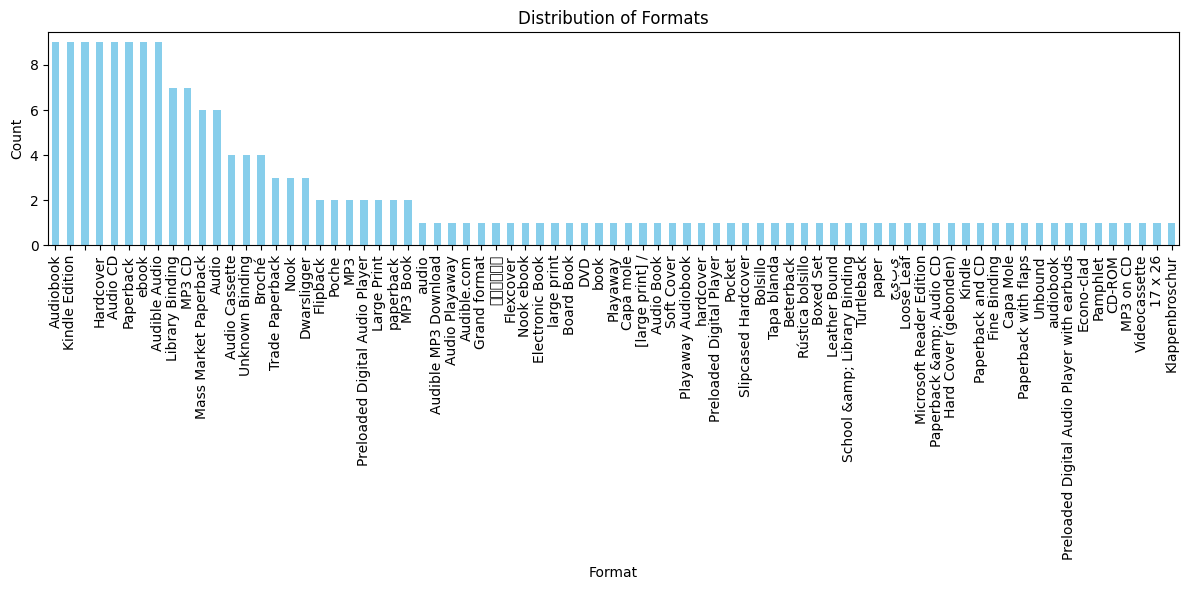

In [11]:
#MY IDEA --> after having the result, I want to investigate how many times a type of format has been used (always related to those authors)

formats_series = all_formats_df['Formats Published'].explode()
#count the occurrences of each format
format_counts = formats_series.value_counts()

#plot
plt.figure(figsize=(12, 6))
format_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Formats')
plt.xlabel('Format')
plt.ylabel('Count')

plt.show()

C:\Users\stefa\AppData\Local\Temp\ipykernel_14432\1132817512.py:14: UserWarning: Glyph 21109 (\N{CJK UNIFIED IDEOGRAPH-5275}) missing from current font.
  plt.tight_layout()
C:\Users\stefa\AppData\Local\Temp\ipykernel_14432\1132817512.py:14: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from current font.
  plt.tight_layout()
C:\Users\stefa\AppData\Local\Temp\ipykernel_14432\1132817512.py:14: UserWarning: Glyph 25512 (\N{CJK UNIFIED IDEOGRAPH-63A8}) missing from current font.
  plt.tight_layout()
C:\Users\stefa\AppData\Local\Temp\ipykernel_14432\1132817512.py:14: UserWarning: Glyph 29702 (\N{CJK UNIFIED IDEOGRAPH-7406}) missing from current font.
  plt.tight_layout()
C:\Users\stefa\AppData\Local\Temp\ipykernel_14432\1132817512.py:14: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from current font.
  plt.tight_layout()
C:\Users\stefa\AppData\Local\Temp\ipykernel_14432\1132817512.py:14: UserWarning: Glyph 24235 (\N{CJK UNIFIED IDEOGRAPH-5EAB}) miss

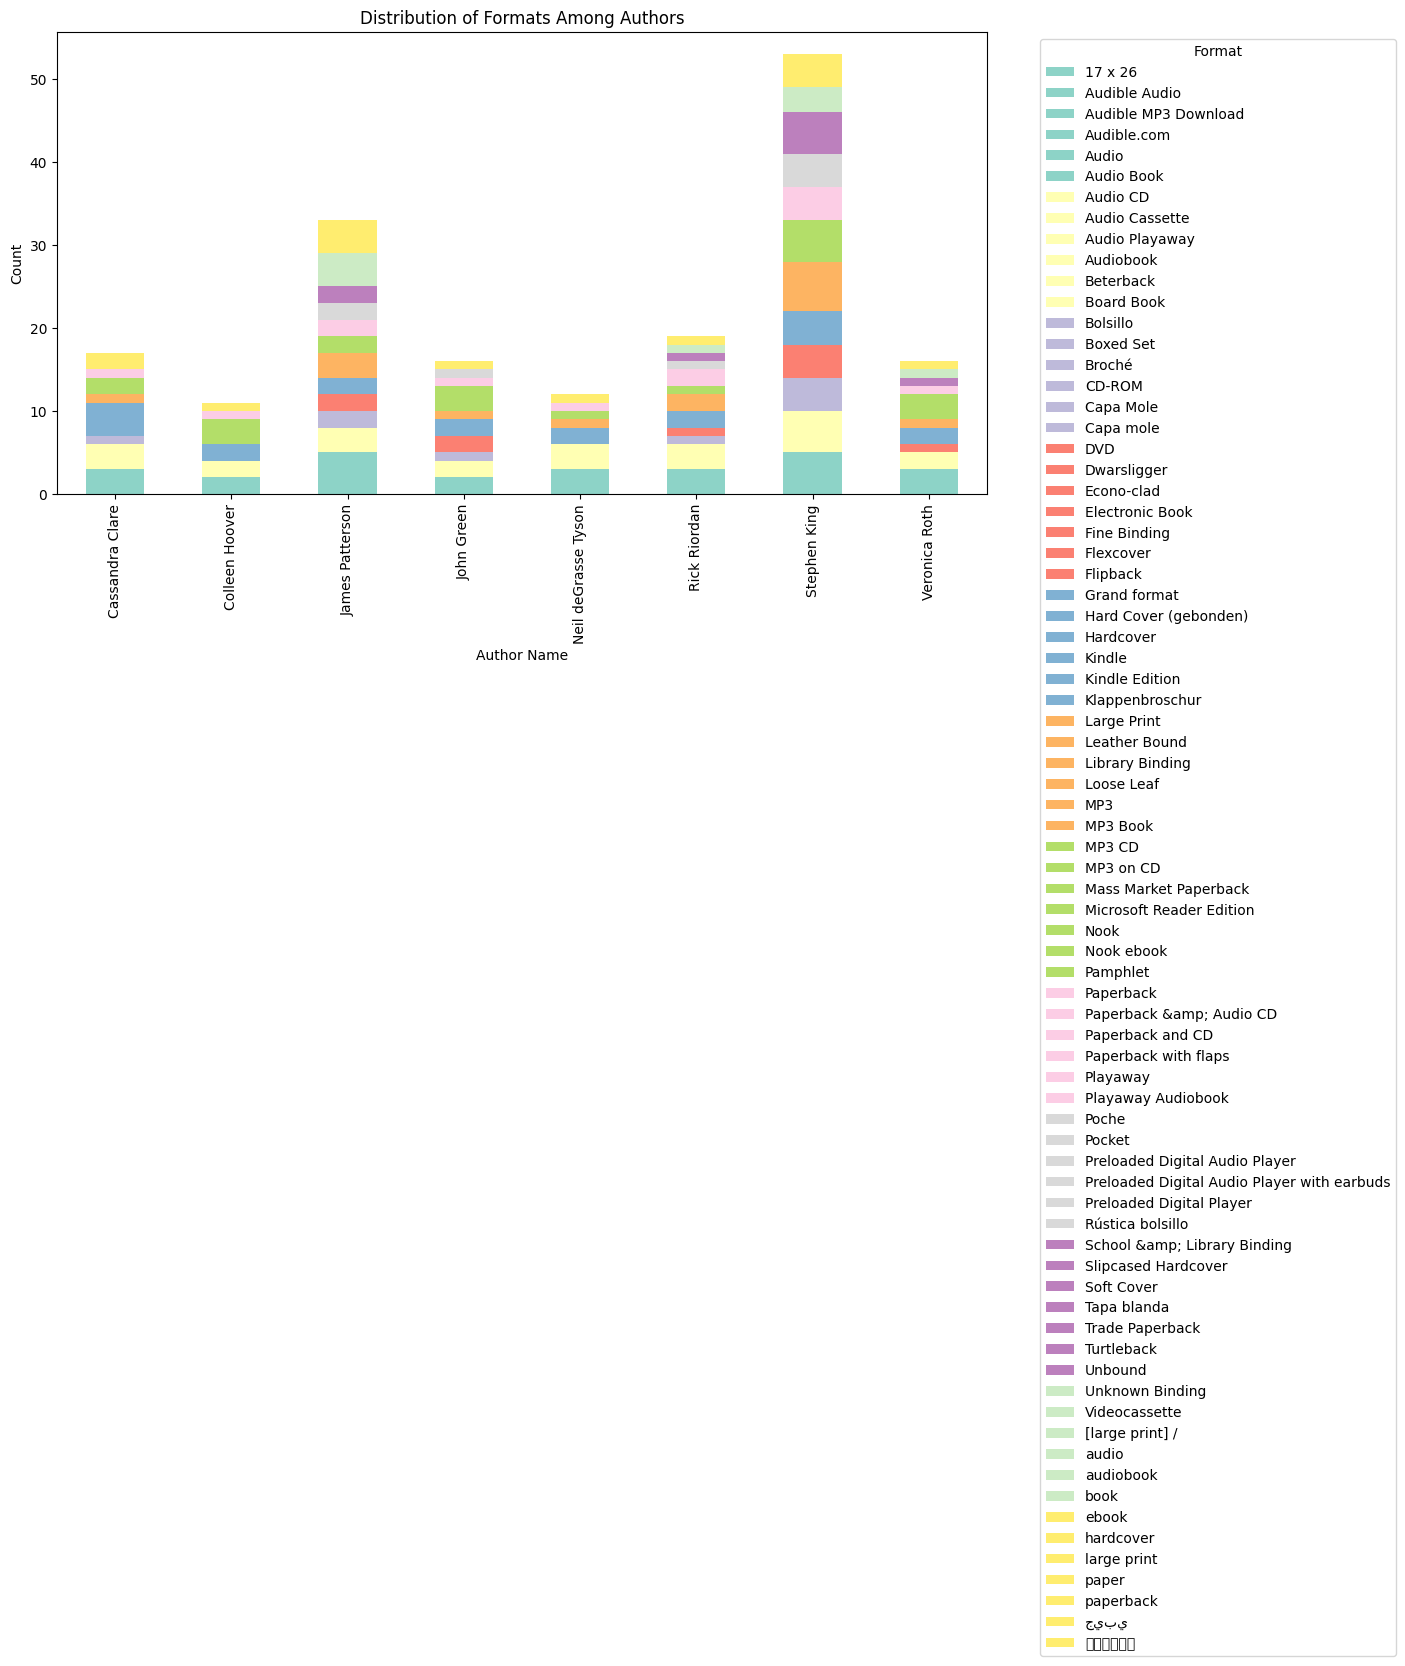

In [25]:
#MY IDEA --> for better visualisation I do the same things but by authors, so no more in general for the types of formats but for each author I investigate how they have been published.

formats_series = all_formats_df['Formats Published'].explode()
#count the occurrences of each format for each author
format_counts = formats_series.groupby(all_formats_df['Author Name']).value_counts().unstack(fill_value=0)

#plot 
format_counts.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='Set3')
plt.title('Distribution of Formats Among Authors')
plt.xlabel('Author Name')
plt.ylabel('Count')

plt.legend(title='Format', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Answer

As we can see from the plot, Audiobook, Kindle edition, Hardcover, Audio CD, Paperback, ebook, audible audio are the most used formats by these authors. Yet, we can see that there is a misentry in the database. For example we can see that Audiobook, Aubible audio, Audio CD, MP3, MP3 Book, ausio, Audio Book are all different categories in the dataframe but refer all in the same category. So there has been a poor classification when creating the dataset. you can see in the second plot how thery are distributed among authors

**RQ5.4**

Provide information about the general response from readers (number of fans, average rating, number of reviews, etc.), divide the authors by gender, and comment about anything eventually related to “structural bias.” 

In [12]:
#MY IDEA --> now I need again the ligher_authors.json file and convert it to a panda dataframe. 
#then I take the columns I need and I create a dataframe with only the authors I need. Then I can proceed with a general response from readers

df_lighter_authors

df = pd.DataFrame({
    'Author Name': df_lighter_authors['name'],
    'Fan Count': df_lighter_authors['fans_count'],
    'Number of Books': df_lighter_authors['book_ids'],
    'Average rating': df_lighter_authors['average_rating'],
    'Works Id': df_lighter_authors["work_ids"],
    "Gender": df_lighter_authors["gender"],
    "reviews": df_lighter_authors["ratings_count"]
})


specific_authors = ["Stephen King", "Veronica Roth","Colleen Hoover", "Rick Riordan", "James Patterson", "John Green", "Neil deGrasse Tyson", "Cassandra Clare"]
specific_authors_df = df[df["Author Name"].isin(specific_authors)]


print(specific_authors_df)


                Author Name  Fan Count  \
1017           Stephen King     766035   
1161        James Patterson     317040   
3818    Neil deGrasse Tyson     277850   
4537           Rick Riordan     339346   
27110       Cassandra Clare     238560   
100166           John Green     282537   
169374        Veronica Roth     455358   
205870       Colleen Hoover     356633   

                                          Number of Books  Average rating  \
1017    [11588, 830502, 149267, 10614, 10592, 43615, 1...            4.04   
1161    [13145, 13148, 13137, 13152, 7494, 13139, 1313...            3.98   
3818    [32191710, 20663770, 20663771, 20707975, 20663...            4.07   
4537    [28187, 2120932, 28186, 4556058, 561456, 77361...            4.32   
27110   [256683, 3777732, 1582996, 7171637, 6752378, 1...            4.24   
100166  [11870085, 99561, 6442769, 49750, 35504431, 65...            4.03   
169374  [13335037, 11735983, 18710190, 18126198, 13615...            4.05   
20587

col_0   Gender Count
Gender              
                   2
female             3
male               3


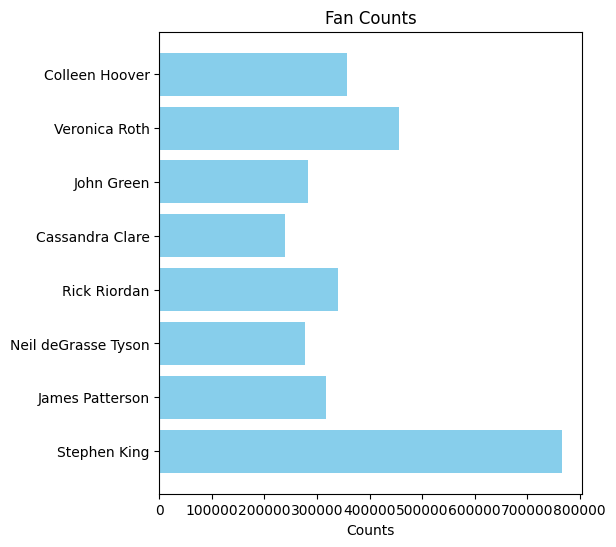

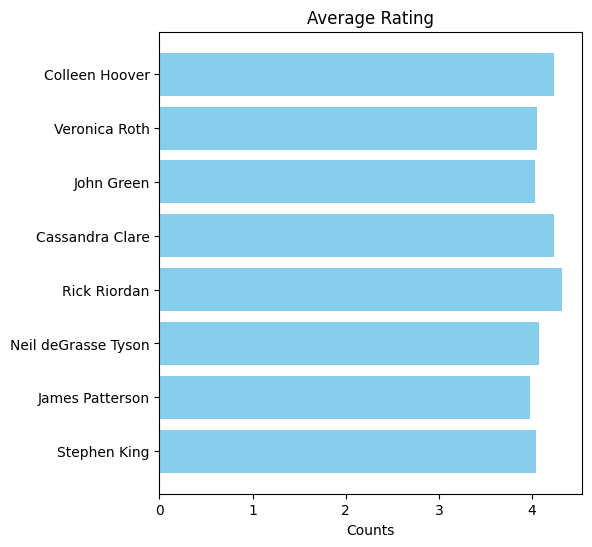

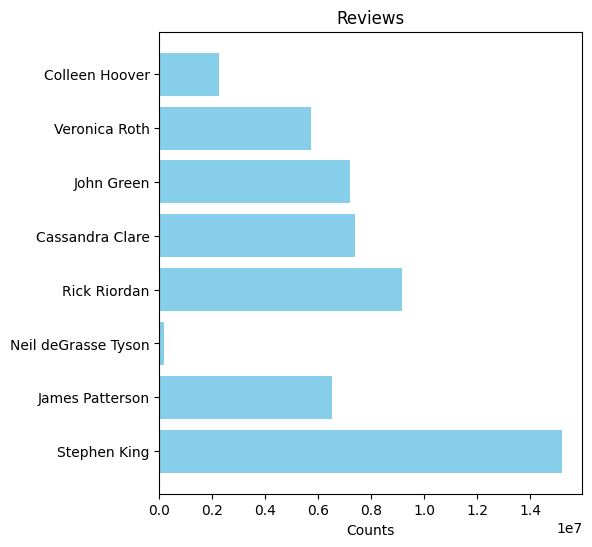

In [34]:
#Fan Counts
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(c['Author Name'], specific_authors_df['Fan Count'], color='skyblue')
plt.xlabel('Counts')
plt.title('Fan Counts')

#average ratings
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(specific_authors_df['Author Name'], specific_authors_df['Average rating'], color='skyblue')
plt.xlabel('Counts')
plt.title('Average Rating')

#number of reviews
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(specific_authors_df['Author Name'], specific_authors_df['reviews'], color='skyblue')
plt.xlabel('Counts')
plt.title('Reviews')

#Gender division
gender_table = pd.crosstab(index=specific_authors_df['Gender'], columns='Count')
# Rename the 'Count' column to 'Gender Count'
gender_table = gender_table.rename(columns={'Count': 'Gender Count'})
# Display the gender frequency table
print(gender_table)

In [52]:
#MY IDEA --> now I want to investigate the statistics

gender_groups = specific_authors_df.groupby('Gender')
avg_rating_stats = gender_groups['Average rating'].describe()
print(avg_rating_stats)
avg_rating_means = gender_groups['Average rating'].mean()
print(avg_rating_means)

avg_rating_stats = gender_groups['reviews'].describe()
print(avg_rating_stats)
avg_rating_means = gender_groups['reviews'].mean()
print(avg_rating_means)

avg_rating_stats = gender_groups['Fan Count'].describe()
print(avg_rating_stats)
avg_rating_means = gender_groups['Fan Count'].mean()
print(avg_rating_means)

        count      mean       std   min    25%   50%   75%   max
Gender                                                          
          2.0  4.050000  0.028284  4.03  4.040  4.05  4.06  4.07
female    3.0  4.176667  0.109697  4.05  4.145  4.24  4.24  4.24
male      3.0  4.113333  0.181475  3.98  4.010  4.04  4.18  4.32
Gender
          4.050000
female    4.176667
male      4.113333
Name: Average rating, dtype: float64
        count          mean           std        min         25%        50%  \
Gender                                                                        
          2.0  3.680892e+06  4.957775e+06   175216.0  1928054.25  3680892.5   
female    3.0  5.126751e+06  2.634922e+06  2239503.0  3989409.50  5739316.0   
male      3.0  1.028479e+07  4.451435e+06  6514711.0  7829400.00  9144089.0   

                75%         max  
Gender                           
         5433730.75   7186569.0  
female   6570375.50   7401435.0  
male    12169834.00  15195579.0  
Gender
 

when exploring the data according to gender, we can see that there is a balance in  **Average Rating** between male and female authors. yet, when analising **Rewiews** and **Fan Counts** there is a massive unbalance between genders. Male authors have more reviews and fan counts even thoug havng the same average rating comparing to the female colleagues.
Still, there are two authors who miss classification in gender.

**RQ6**

For this question, consider the top 10 authors concerning the number of fans again.

                Author Name  Fan Count  \
1017           Stephen King     766035   
169374        Veronica Roth     455358   
6397            Bill  Gates     446876   
205870       Colleen Hoover     356633   
4537           Rick Riordan     339346   
1161        James Patterson     317040   
100166           John Green     282537   
3818    Neil deGrasse Tyson     277850   
27110       Cassandra Clare     238560   
32358          Mindy Kaling     234647   

                                          Number of Books  
1017    [11588, 830502, 149267, 10614, 10592, 43615, 1...  
169374  [13335037, 11735983, 18710190, 18126198, 13615...  
6397    [36603020, 39731947, 41619, 1081637, 41814307,...  
205870  [15717943, 27362503, 30333938, 17788401, 24445...  
4537    [28187, 2120932, 28186, 4556058, 561456, 77361...  
1161    [13145, 13148, 13137, 13152, 7494, 13139, 1313...  
100166  [11870085, 99561, 6442769, 49750, 35504431, 65...  
3818    [32191710, 20663770, 20663771, 20707975, 20663...

Text(0.5, 1.0, 'Top 10 Authors with fans')

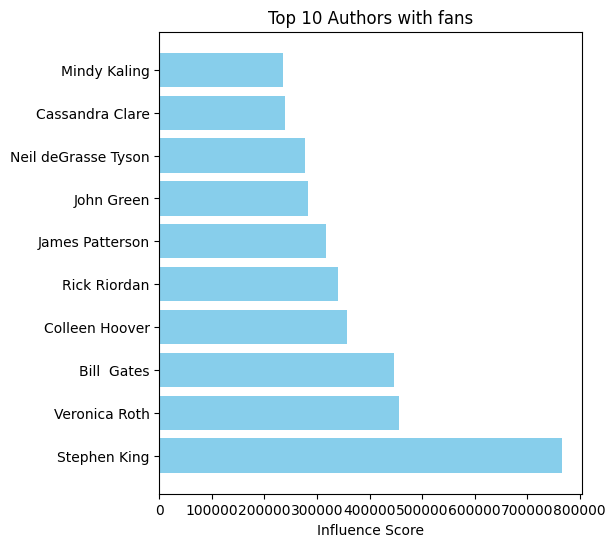

In [55]:
#MY IDEA --> take the top 10 authors with the most fans for both files.

df = pd.DataFrame({
    'Author Name': df_lighter_authors['name'],
    'Fan Count': df_lighter_authors['fans_count'],
    'Number of Books': df_lighter_authors['book_ids']
})


# Sort the DataFrame by 'Influence Score' in descending order
sorted_df = df.sort_values(by='Fan Count', ascending=False)
# Select the top 10 authors
top_10_authors = sorted_df.head(10)
# Print the top 10 influential authors
print(top_10_authors[['Author Name', 'Fan Count', 'Number of Books']])

# Plot the data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(top_10_authors['Author Name'], top_10_authors['Fan Count'], color='skyblue')
plt.xlabel('Influence Score')
plt.title('Top 10 Authors with fans')

**RQ6.1** 

Provide the average time gap between two subsequent publications for a series of books and those not belonging to a series. What do you expect to see, and what is the actual answer to this question?

**RQ6.2**

For each of the authors, give a convenient plot showing how many books has the given author published UP TO a given year. Are these authors contemporary with each other? Can you notice a range of years where their production rate was higher?